# Kaggle训练数据Loan Data数据分析

## 1 数据初探

### 1.1 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.sans-serif']=['SimHei']
bankpersonal_df=pd.read_excel('C:/data/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx')
df=bankpersonal_df.copy()

### 1.2 查看数据结构及各特征值属性

In [2]:
display(df.head(3))
df.info()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


数据集描述：该数据集提供了5000条某银行客户信息数据，主要特征值描述如下：
ID:为该数据集的主键，唯一标识每一名客户；
Experience:为客户的工作经验年限；
Family:为每位客户家庭人数；
CCAvg:每月偿还信用卡金额；
Education:教育水平，1：本科生 2：研究生 3：博士生；
Mortgage:房产抵押的价值；
Personal Loan：上次营销活动后客户是否接受了贷款，0：否 1：是，这是我们的目标变量
Securities Account：是否拥有证券账户，0：否 1：是；；
CD Account：是否拥有该行定期存款账户，0：否 1：是；
Online：是否使用电子银行服务，0：否 1：是；
CreditCard ：是否拥有该行信用卡，0：否 1：是。

### 1.3 查看数据集是否存在空值

In [3]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

该数据集各特征值不存在空值

### 1.4 数据集简单描述信息

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


我们观察到Experience工作经验字段存在负值的情况，显然不符合现实

In [5]:
df[df['Experience']<0]['Experience'].count()

52

Experience特征存在52个负值，出现负值的原因可能与前期数据采集人员录入错误有关，我们需要填补这部分负值

### 1.5 修改Experience为负值的数据

Text(0,0.5,'工作经验')

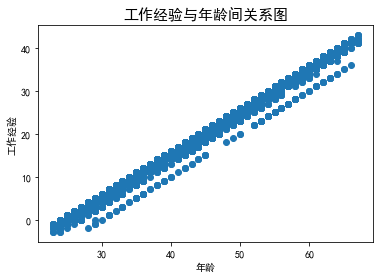

In [6]:
f,ax = plt.subplots()
ax.scatter(df['Age'],df['Experience'])
ax.set_title('工作经验与年龄间关系图',fontsize=15)
ax.set_xlabel('年龄')
ax.set_ylabel('工作经验')

我们看到工作经验与年龄呈现正线性关系，我们可以用相同年龄客户的平均工作经验年限来填补Experience为负值的数据

将Experience为负值的数据替换为空值

In [7]:
 df.loc[df['Experience']<0,'Experience']=np.nan

用相同年龄客户的平均工作经验年限来填补Experience为空值的数据

In [8]:
df['Experience'] = df['Experience'].fillna(df.groupby(['Age'])['Experience'].transform('mean'))

In [15]:
df.isnull().sum()

ID                     0
Age                    0
Experience            12
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

我们发现填补完后仍存在少量缺失值，我们观察这部分仍为空值的部分

In [9]:
print(df[df['Experience'].isnull()])

        ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
670    671   23         NaN      61     92374       4  2.600000          1   
909    910   23         NaN     149     91709       1  6.333333          1   
2430  2431   23         NaN      73     92120       4  2.600000          1   
2618  2619   23         NaN      55     92704       3  2.400000          2   
2717  2718   23         NaN      45     95422       4  0.600000          2   
2962  2963   23         NaN      81     91711       2  1.800000          2   
3130  3131   23         NaN      82     92152       2  1.800000          2   
3157  3158   23         NaN      13     94720       4  1.000000          1   
3425  3426   23         NaN      12     91605       4  1.000000          1   
3824  3825   23         NaN      12     95064       4  1.000000          1   
4285  4286   23         NaN     149     93555       2  7.200000          1   
4411  4412   23         NaN      75     90291       2  1.800000 

观察发现这部分缺失值仍存在的原因为年龄为23岁的这部分群体的Experience整体为空，我们考虑用年龄为24岁客户群体的工作年限平均值进行填补

In [10]:
df_Age=df.groupby(['Age'])['Experience'].mean().to_frame().reset_index()
print(df_Age[df_Age['Age']==24])

   Age  Experience
1   24         0.0


In [11]:
df=df.fillna(value=0)

In [12]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

我们可以看到填补完的数据集Experience已无缺失值

## 2 EDA

### 2.1 收入、教育水平对个人贷款的影响

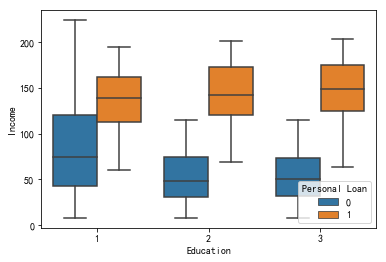

In [13]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

从上图我们可以看到，在无贷款人群中，本科生的平均收入高于研究生和博士生，而在贷款人群中收入水平则未表现出同样的趋势。

### 2.2 抵押房产价值与个人贷款关系分析

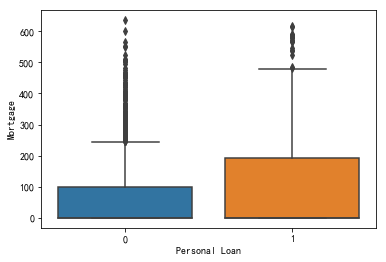

In [14]:
sns.boxplot(x='Personal Loan',y='Mortgage',data=df)

从上图我们可以看到，无贷款人群房产抵押的价值要明显低于有贷款人群

### 2.3 有无贷款与客户是否拥有证券账户关系分析

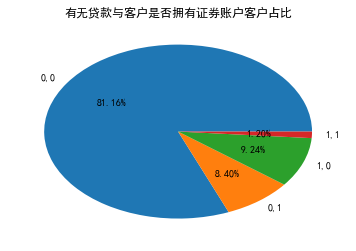

In [15]:
df_sa=df.groupby(['Securities Account','Personal Loan'])['ID'].count().reset_index()
df_sa['labels']= df_sa['Securities Account'].astype('str') + ',' + df_sa['Personal Loan'].astype('str')
plt.pie(df_sa['ID'],labels=df_sa['labels'],autopct='%1.2f%%')
plt.title('有无贷款与客户是否拥有证券账户客户占比')
plt.show()

从上图我们可以看到,有证券账户客户中贷款客户比例高于无证券账户客户中贷款客户比例

### 2.4 家庭大小与是否贷款之间的关系分析

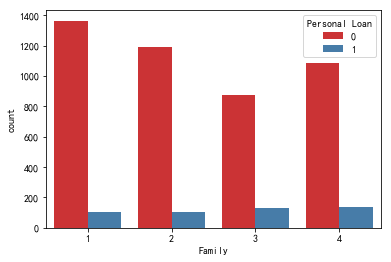

In [16]:
sns.countplot(x='Family',data=df,hue='Personal Loan',palette='Set1')

从上图我们可以看到，家庭人数为3的客户群体中，贷款的比例高于其他家庭人数

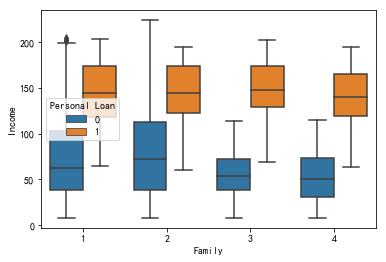

In [17]:
sns.boxplot(x=df.Family,y=df.Income,hue=df['Personal Loan'])

从上图我们可以看到，在无贷款客户群体中家庭人数为2的客户群体收入水平要高于其他家庭人数类型，而有贷款群体中家庭人数与收入之间则无明显相关关系

### 2.5是否存在定期存款账户与是否贷款之间的关系

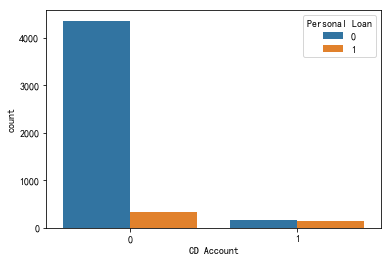

In [18]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

从上图我们可以看见，拥有定期存款账户的客户群体中贷款客户的比列接近100%

### 2.6 平均每月偿还信用卡金额和是否有贷款间的关系

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


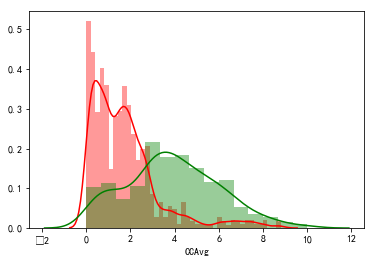

In [19]:
sns.distplot(df[df['Personal Loan']== 0]['CCAvg'],color = 'r')
sns.distplot(df[df['Personal Loan']== 1]['CCAvg'], color = 'g')

从趋势上看平均每月偿还信用卡金额越多，贷款的可能性就越大。

### 2.7 特征相关性

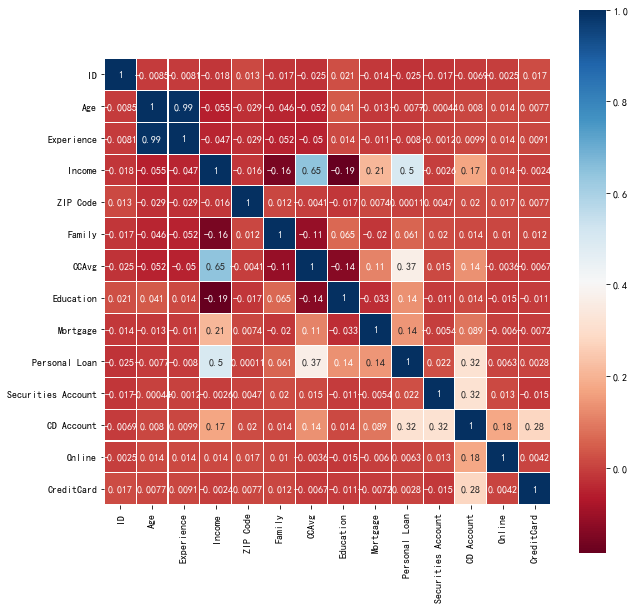

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

从特征相关性图中我们发现年龄和工作经验高度相关，在纳入模型时我们考虑将Experience字段删除

### 2.8 将不纳入模型特征删除

In [21]:
df=df.drop(['ID','Experience'],axis=1)

## 3 模型预测

### 3.1 构造训练集、测试集

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.3,random_state=100)
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

### 3.2 训练随机森林模型

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_depth=9, random_state=0)
rfc.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### 3.3 模型性能评估（采用AUC）

In [24]:
from sklearn.metrics import roc_auc_score
print('train')
print( roc_auc_score(train_labels, rfc.predict(train_set)) )
print('test')
print( roc_auc_score(test_labels, rfc.predict(test_set)) )

train
0.9782608695652174
test
0.9309362561074535
